# Import to used libraries

In [1]:
# Linear algebra functions
import numpy as np 

# Data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# Plotting library
import matplotlib.pyplot as plt  

# Data visualization library based on matplotlib
import seaborn as sns  

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split,GridSearchCV  

# Standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler  

# RandomForestClassifier is an ensemble learning method for classification
from sklearn.ensemble import RandomForestClassifier  

# Metrics to evaluate the performance of the classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve  

# LogisticRegression is a classification algorithm
from sklearn.linear_model import LogisticRegression  

# GradientBoostingClassifier is an ensemble learning method for classification
from sklearn.ensemble import GradientBoostingClassifier  

# SVC is a Support Vector Classification algorithm
from sklearn.svm import SVR 

# KNeighborsClassifier is a k-nearest neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier  

# GaussianNB is a Naive Bayes classification algorithm
from sklearn.naive_bayes import GaussianNB 

# LinearRegression is a classification algorithm
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

# DecisionTreeClassifier is a tree-based classification algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import folium
from folium.plugins import HeatMap

In [2]:
# Read the diabetes dataset from the specified CSV file
df = pd.read_csv("/kaggle/input/india-house-prices/House Price India.csv")
# Display the first few rows of the dataset
df.head()

,id,Date,No of bedrooms,No of bathrooms,living area,lot area,No of floors,waterfront present,No of views,house condition,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,No of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [3]:
# Inspect the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14619 non-null  int64  
 1   Date                            14619 non-null  int64  
 2   No of bedrooms                  14619 non-null  int64  
 3   No of bathrooms                 14619 non-null  float64
 4   living area                     14619 non-null  int64  
 5   lot area                        14619 non-null  int64  
 6   No of floors                    14619 non-null  float64
 7   waterfront present              14619 non-null  int64  
 8   No of views                     14619 non-null  int64  
 9   house condition                 14619 non-null  int64  
 10  house grade                     14619 non-null  int64  
 11  house area(excluding basement)  14619 non-null  int64  
 12  Area of the basement            

In [4]:
# Check for null values in the dataset
df[df.isnull().any(axis=1)]

,id,Date,No of bedrooms,No of bathrooms,living area,lot area,No of floors,waterfront present,No of views,house condition,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,No of schools nearby,Distance from the airport,Price


In [5]:
# Check for duplicate rows in the dataset.
# The `duplicated()` function returns a Series of booleans where True indicates duplicate rows.
# The `sum()` function then counts the number of duplicate rows.
print(f"Dataset duplicate values: {df.duplicated().sum()}")

Dataset duplicate values: 0


In [6]:
# Convert the 'Date' column to datetime format using the origin '1899-12-30' and unit 'D'
df['Date'] = pd.to_datetime(df['Date'], origin='1899-12-30', unit='D')

# Drop the 'id' column from the dataframe because it contains unique values and does not contribute to the analysis
df = df.drop(["id"], axis=1)

In [7]:
# Create a copy of the dataframe for further analysis
house_price_data = df.copy()

***Exploratory Data Analysis - EDA***

In [8]:
house_price_data['Month'] = house_price_data['Date'].dt.month

In [9]:
house_price_data['Day_of_Week'] = house_price_data['Date'].dt.day_name()

In [10]:
house_price_data['Month'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [11]:
house_price_data.head()

,Date,No of bedrooms,No of bathrooms,living area,lot area,No of floors,waterfront present,No of views,house condition,house grade,...,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,No of schools nearby,Distance from the airport,Price,Month,Day_of_Week
0,2016-05-01,4,2.50,2920,4000,1.5,0,0,5,8,...,122004,52.8878,-114.470,2470,4000,2,51,1400000,5,Sunday
1,2016-05-01,5,2.75,2910,9480,1.5,0,0,3,8,...,122004,52.8852,-114.468,2940,6600,1,53,1200000,5,Sunday
2,2016-05-01,4,2.50,3310,42998,2.0,0,0,3,9,...,122005,52.9532,-114.321,3350,42847,3,76,838000,5,Sunday
3,2016-05-01,3,2.00,2710,4500,1.5,0,0,4,8,...,122006,52.9047,-114.485,2060,4500,1,51,805000,5,Sunday
4,2016-05-01,3,2.50,2600,4750,1.0,0,0,4,9,...,122007,52.9133,-114.590,2380,4750,1,67,790000,5,Sunday


# Feature Engineering and Visualization

In [12]:
# Create a new feature 'House_Age' by subtracting the 'Built Year' from the current year 2023
house_price_data['House_Age'] = 2023 - house_price_data['Built Year']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


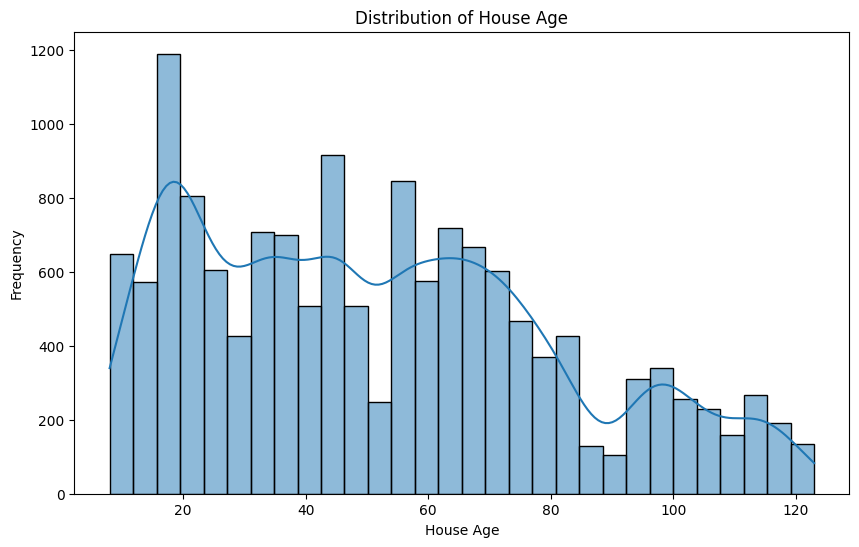

In [13]:
# Plot the distribution of the 'House_Age' feature
plt.figure(figsize=(10, 6))
sns.histplot(house_price_data['House_Age'], kde=True, bins=30)
plt.title('Distribution of House Age')
plt.xlabel('House Age')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Calculate the average house price for each month
monthly_avg_price = house_price_data.groupby('Month')['Price'].mean().reset_index()

In [15]:
# Create a new feature 'Price_per_sqft' by dividing 'Price' by 'living area'
house_price_data['Price_per_sqft'] = house_price_data['Price'] / house_price_data['living area']

# Create a new feature 'Baths_per_bedroom' by dividing 'No of bathrooms' by 'No of bedrooms'
house_price_data['Baths_per_bedroom'] = house_price_data['No of bathrooms'] / house_price_data['No of bedrooms']

# Print the first 5 rows of the new features to verify their creation
print(house_price_data[['Price_per_sqft', 'Baths_per_bedroom']].head())

   Price_per_sqft  Baths_per_bedroom
0      479.452055           0.625000
1      412.371134           0.550000
2      253.172205           0.625000
3      297.047970           0.666667
4      303.846154           0.833333


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


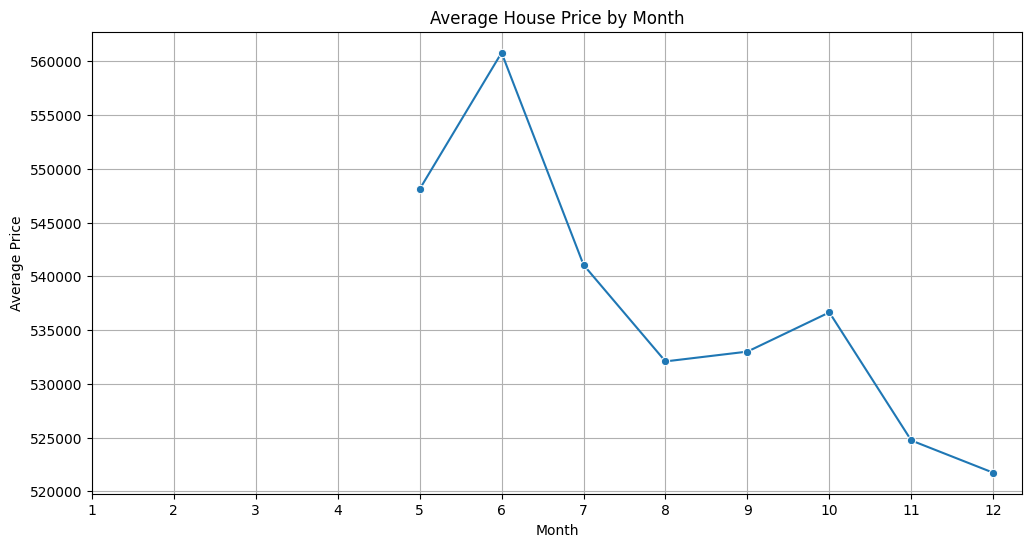

In [16]:
# Plot the average house price by month
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_price, x='Month', y='Price', marker='o')
plt.title('Average House Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13))  # Ensure the x-axis shows all months from 1 to 12
plt.grid(True)
plt.show()

In [17]:
# Function to determine the season based on the month
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Apply the get_season function to the 'Month' column to create the 'Season' feature
house_price_data['Season'] = house_price_data['Month'].apply(get_season)


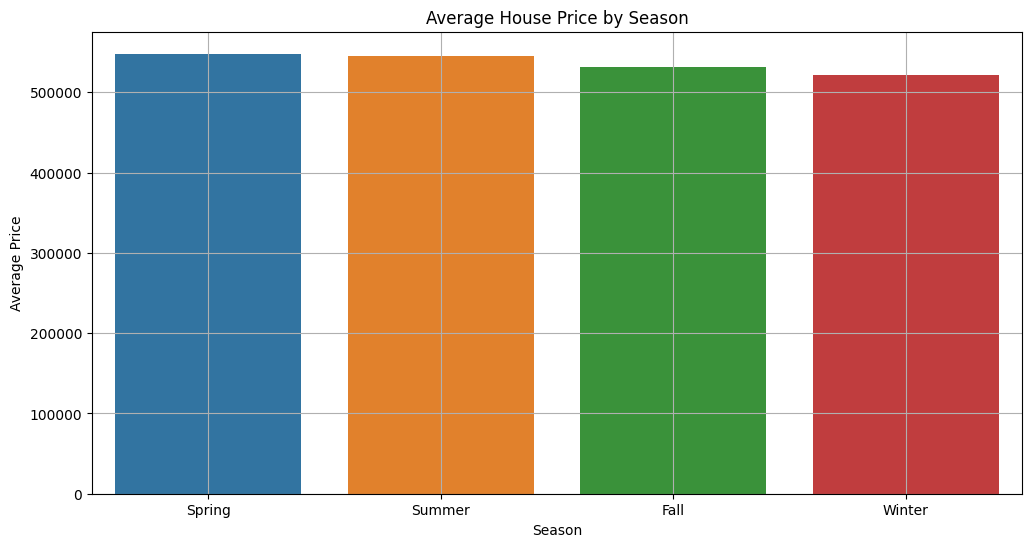

In [18]:
# Calculate the average house price for each season
seasonal_avg_price = house_price_data.groupby('Season')['Price'].mean().reset_index()

# Plot the average house price by season
plt.figure(figsize=(12, 6))
sns.barplot(data=seasonal_avg_price, x='Season', y='Price', order=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Average House Price by Season')
plt.xlabel('Season')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [19]:
# Calculate the number of house sales for each month
monthly_sales = house_price_data['Month'].value_counts().sort_index().reset_index()

# Rename the columns to 'Month' and 'Sales'
monthly_sales.columns = ['Month', 'Sales']

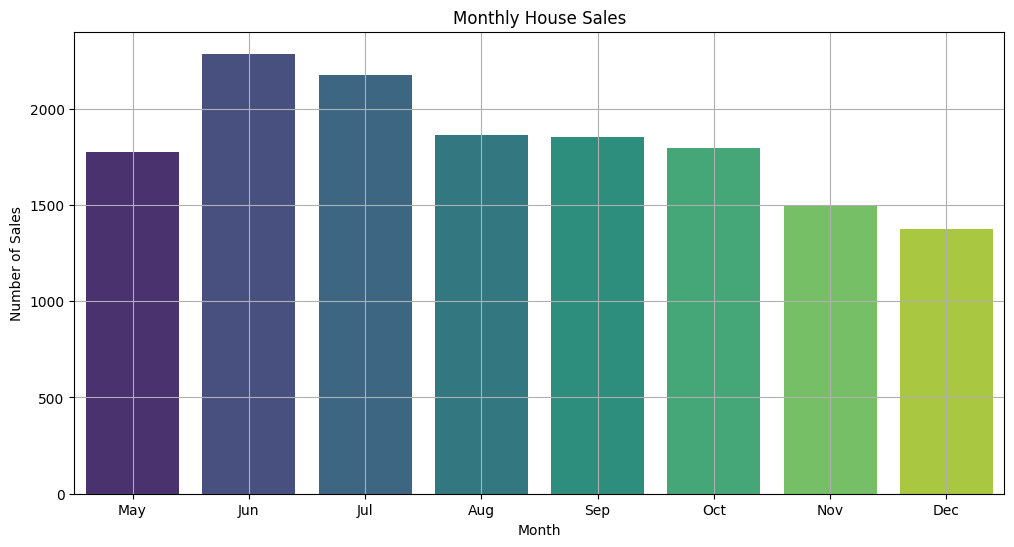

In [20]:
# Plot the number of house sales for each month
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='Month', y='Sales', palette='viridis')
plt.title('Monthly House Sales')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(range(0, 8), ['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

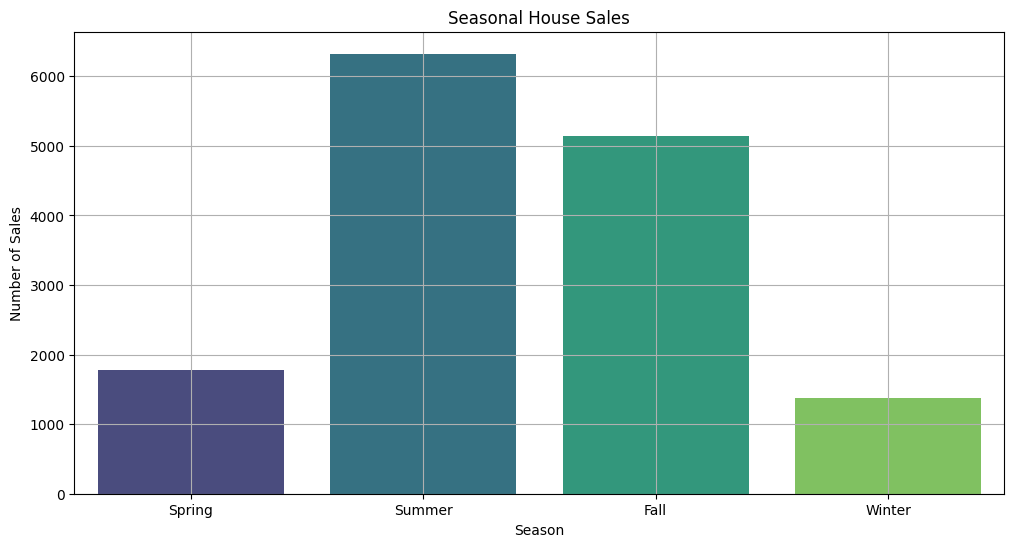

In [21]:
# Calculate the number of house sales for each season
seasonal_sales = house_price_data['Season'].value_counts().sort_index().reset_index()

# Rename the columns to 'Season' and 'Sales'
seasonal_sales.columns = ['Season', 'Sales']

# Plot the number of house sales for each season
plt.figure(figsize=(12, 6))
sns.barplot(data=seasonal_sales, x='Season', y='Sales', palette='viridis', order=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Seasonal House Sales')
plt.xlabel('Season')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.show()

In [22]:
# Apply the get_season function to the 'Month' column to create the 'Season' feature
house_price_data['Season'] = house_price_data['Month'].apply(get_season)

In [23]:
# Create a mapping of seasons to numerical values
season_mapping = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}

# Map the 'Season' column to numerical values using the season_mapping dictionary and create a new column 'Season_Num'
house_price_data['Season_Num'] = house_price_data['Season'].map(season_mapping)

In [24]:
# Extract the day from the 'Date' column and create a new column 'Day'
house_price_data['Day'] = house_price_data['Date'].dt.day

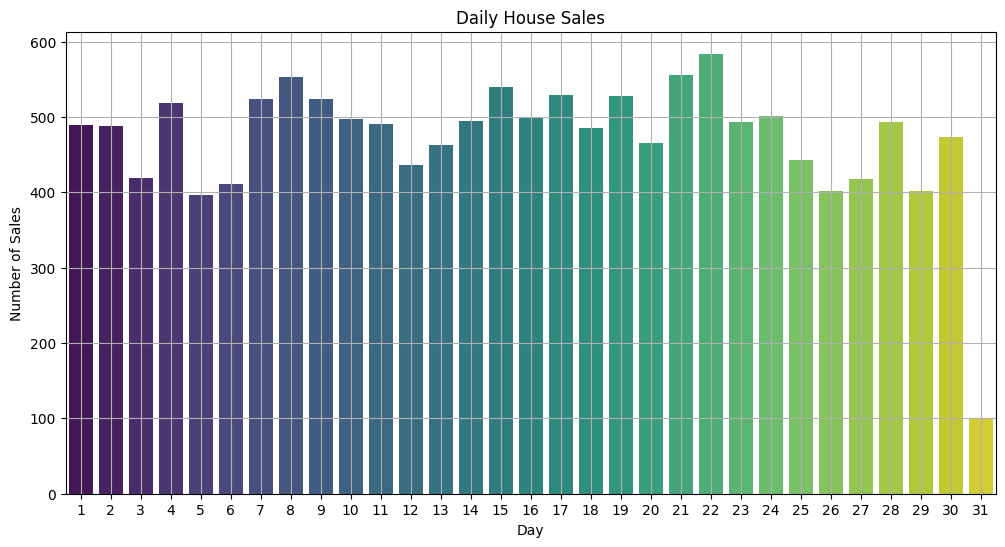

In [25]:
# Calculate the number of house sales for each day of the month
daily_sales = house_price_data['Day'].value_counts().sort_index().reset_index()

# Rename the columns to 'Day' and 'Sales'
daily_sales.columns = ['Day', 'Sales']

# Visualize the number of house sales for each day of the month
plt.figure(figsize=(12, 6))
sns.barplot(data=daily_sales, x='Day', y='Sales', palette='viridis')
plt.title('Daily House Sales')
plt.xlabel('Day')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.show()

In [26]:
# Calculate the number of house sales for each day of the week using 'Day_of_Week'
daily_sales = house_price_data['Day_of_Week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

# Rename the columns to 'Day_of_Week' and 'Sales'
daily_sales.columns = ['Day_of_Week', 'Sales']

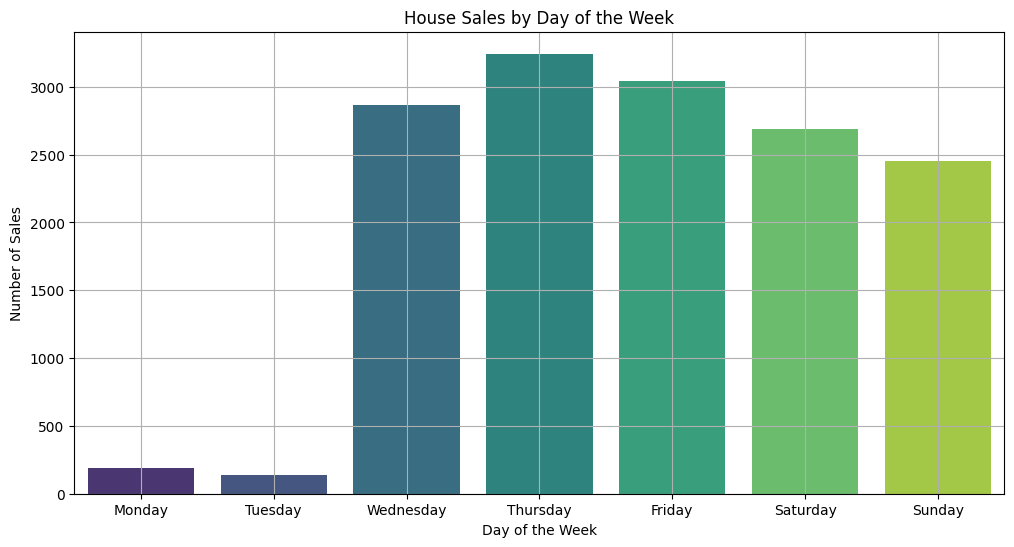

In [27]:
# Visualize the number of house sales for each day of the week
plt.figure(figsize=(12, 6))
sns.barplot(data=daily_sales, x='Day_of_Week', y='Sales', palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('House Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


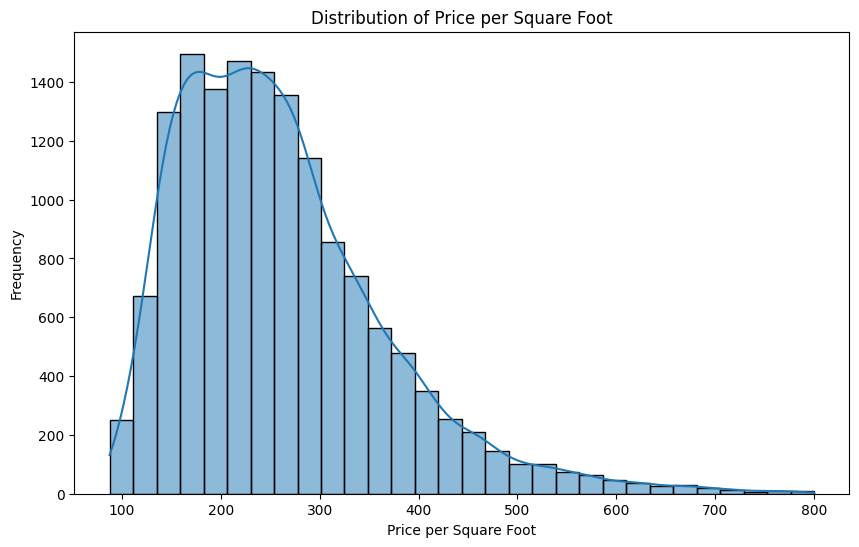

In [28]:
# Plot the distribution of the 'Price_per_sqft' feature
plt.figure(figsize=(10, 6))
sns.histplot(house_price_data['Price_per_sqft'], kde=True, bins=30)
plt.title('Distribution of Price per Square Foot')
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


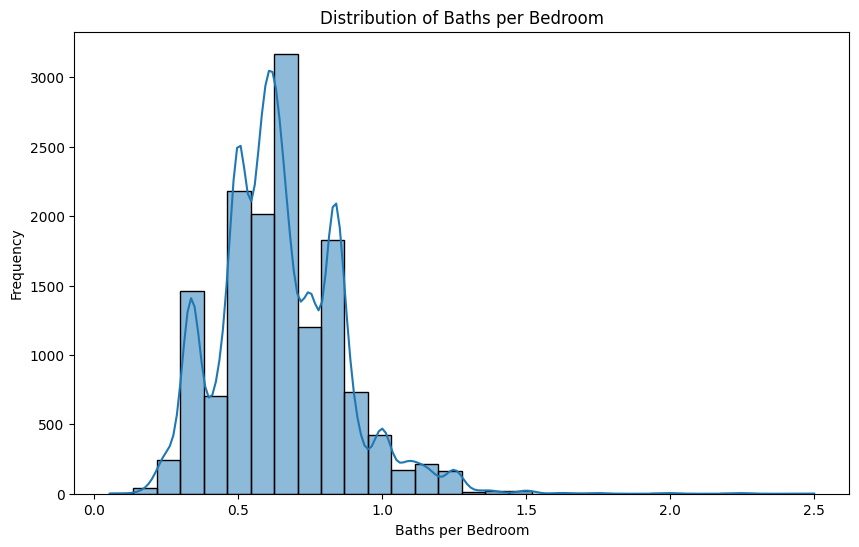

In [29]:
# Plot the distribution of the 'Baths_per_bedroom' feature
plt.figure(figsize=(10, 6))
sns.histplot(house_price_data['Baths_per_bedroom'], kde=True, bins=30)
plt.title('Distribution of Baths per Bedroom')
plt.xlabel('Baths per Bedroom')
plt.ylabel('Frequency')
plt.show()

In [30]:
house_price_data.head()

,Date,No of bedrooms,No of bathrooms,living area,lot area,No of floors,waterfront present,No of views,house condition,house grade,...,Distance from the airport,Price,Month,Day_of_Week,House_Age,Price_per_sqft,Baths_per_bedroom,Season,Season_Num,Day
0,2016-05-01,4,2.50,2920,4000,1.5,0,0,5,8,...,51,1400000,5,Sunday,114,479.452055,0.625000,Spring,1,1
1,2016-05-01,5,2.75,2910,9480,1.5,0,0,3,8,...,53,1200000,5,Sunday,84,412.371134,0.550000,Spring,1,1
2,2016-05-01,4,2.50,3310,42998,2.0,0,0,3,9,...,76,838000,5,Sunday,22,253.172205,0.625000,Spring,1,1
3,2016-05-01,3,2.00,2710,4500,1.5,0,0,4,8,...,51,805000,5,Sunday,94,297.047970,0.666667,Spring,1,1
4,2016-05-01,3,2.50,2600,4750,1.0,0,0,4,9,...,67,790000,5,Sunday,72,303.846154,0.833333,Spring,1,1


In [31]:
house_price_data=house_price_data.drop(['Date','Season','Day_of_Week'],axis=1)

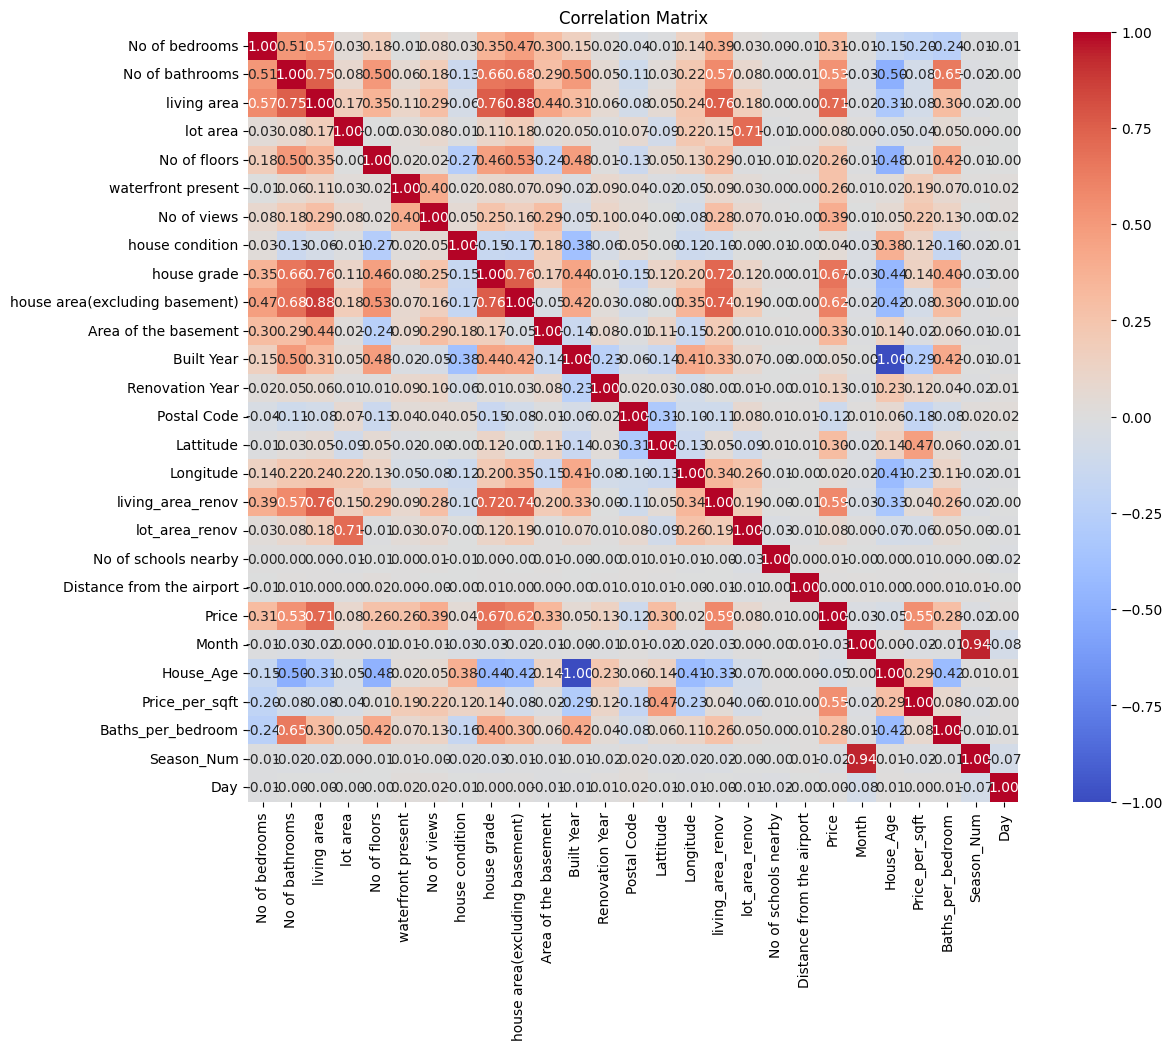

In [32]:
# Calculate the correlation matrix
correlation_matrix = house_price_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [33]:
def get_highly_correlated_pairs(correlation_matrix, threshold=0.7):
    """
    Find and return pairs of features with correlation greater than the specified threshold.
    
    Parameters:
    correlation_matrix (pd.DataFrame): The correlation matrix.
    threshold (float): The correlation threshold.
    
    Returns:
    list of tuples: Each tuple contains a pair of features and their correlation coefficient.
    """
    correlated_pairs = []
    for i in range(correlation_matrix.shape[0]):
        for j in range(i + 1, correlation_matrix.shape[1]):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                correlated_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))
    return correlated_pairs

# Get highly correlated pairs
highly_correlated_pairs = get_highly_correlated_pairs(correlation_matrix)

# Print the highly correlated pairs
for pair in highly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

No of bathrooms and living area: 0.75
living area and house grade: 0.76
living area and house area(excluding basement): 0.88
living area and living_area_renov: 0.76
living area and Price: 0.71
lot area and lot_area_renov: 0.71
house grade and house area(excluding basement): 0.76
house grade and living_area_renov: 0.72
house area(excluding basement) and living_area_renov: 0.74
Built Year and House_Age: -1.00
Month and Season_Num: 0.94


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calculate_vif(df, features):
    """
    Calculate the Variance Inflation Factor (VIF) for each feature.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the features.
    features (list): A list of feature names to calculate VIF for.

    Returns:
    pd.DataFrame: A DataFrame containing the features and their corresponding VIF values.
    """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
    return vif_data

# List of features to be used in the model
features = ['No of bathrooms', 'living area', 'house grade', 'house area(excluding basement)', 
            'living_area_renov', 'Price', 'lot area', 'lot_area_renov', 'Month', 'Season_Num', 'House_Age']

# Calculate VIF
vif_df = calculate_vif(house_price_data, features)
print(vif_df)


                           Feature         VIF
0                  No of bathrooms   23.941147
1                      living area   43.402995
2                      house grade   55.315468
3   house area(excluding basement)   29.270536
4                living_area_renov   25.825998
5                            Price    6.796798
6                         lot area    2.333291
7                   lot_area_renov    2.529648
8                            Month  118.657822
9                       Season_Num   80.347864
10                       House_Age    4.837111


In [35]:
# Drop the specified columns from the DataFrame
house_price_data = house_price_data.drop(['Season_Num', 'house area(excluding basement)', 'living_area_renov'], axis=1)

# Model Training and Evaluation

In [36]:
# Separate the features (X) and the target variable (y)
X = house_price_data.drop(['Price'], axis=1)  # Drop the 'Price' column to get the features
y = house_price_data['Price']  # Select the 'Price' column as the target variable

# Print the first few rows of X and y to verify the separation
print("Features (X):")
print(X.head())
print("\nTarget Variable (y):")
print(y.head())


Features (X):
   No of bedrooms  No of bathrooms  living area  lot area  No of floors  \
0               4             2.50         2920      4000           1.5   
1               5             2.75         2910      9480           1.5   
2               4             2.50         3310     42998           2.0   
3               3             2.00         2710      4500           1.5   
4               3             2.50         2600      4750           1.0   

   waterfront present  No of views  house condition  house grade  \
0                   0            0                5            8   
1                   0            0                3            8   
2                   0            0                3            9   
3                   0            0                4            8   
4                   0            0                4            9   

   Area of the basement  ...  Lattitude  Longitude  lot_area_renov  \
0                  1010  ...    52.8878   -114.470      

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the resulting datasets to verify the split
print("Training Features (X_train):", X_train.shape)
print("Testing Features (X_test):", X_test.shape)
print("Training Target (y_train):", y_train.shape)
print("Testing Target (y_test):", y_test.shape)

Training Features (X_train): (11695, 23)
Testing Features (X_test): (2924, 23)
Training Target (y_train): (11695,)
Testing Target (y_test): (2924,)


In [38]:
# Define the center of the map as the mean latitude and longitude of the data
map_center = [house_price_data['Lattitude'].mean(), house_price_data['Longitude'].mean()]

# Create a map centered around the mean latitude and longitude
heatmap = folium.Map(location=map_center, zoom_start=10)

# Prepare the heatmap data
heat_data = [[row['Lattitude'], row['Longitude'], row['Price']] for index, row in house_price_data.iterrows()]

# Add the heatmap to the map
HeatMap(heat_data).add_to(heatmap)

# Save the map as an HTML file
heatmap.save('house_price_heatmap.html')

# Display the map in the notebook (if applicable)
heatmap

In [39]:
# Define the geographical features
features_geo = ['Lattitude', 'Longitude']

# Separate the geographical features (X_geo) and the target variable (y_geo)
X_geo = house_price_data[features_geo]
y_geo = house_price_data['Price']

# Split the data into training and testing sets
X_train_geo, X_test_geo, y_train_geo, y_test_geo = train_test_split(X_geo, y_geo, test_size=0.2, random_state=42)

# Create and train the linear regression model
model_geo = LinearRegression()
model_geo.fit(X_train_geo, y_train_geo)

# Make predictions and evaluate the model
y_pred_geo = model_geo.predict(X_test_geo)
mse_geo = mean_squared_error(y_test_geo, y_pred_geo)
r2_geo = r2_score(y_test_geo, y_pred_geo)

# Print the evaluation metrics
print(f'Mean Squared Error (Geographical Features): {mse_geo}')
print(f'R2 Score (Geographical Features): {r2_geo}')

Mean Squared Error (Geographical Features): 134845768570.66052
R2 Score (Geographical Features): 0.0888557573069989


In [40]:
# Create and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 16367631101.913523
R2 Score: 0.8894049624017923


In [41]:
# Decision Tree Model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Decision Tree - Mean Squared Error: {mse_dt}')
print(f'Decision Tree - R2 Score: {r2_dt}')

# Random Forest Model
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R2 Score: {r2_rf}')

# XGBoost Model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost - Mean Squared Error: {mse_xgb}')
print(f'XGBoost - R2 Score: {r2_xgb}')

Decision Tree - Mean Squared Error: 5434370614.867305
Decision Tree - R2 Score: 0.9632803049670651
Random Forest - Mean Squared Error: 1734591020.6418316
Random Forest - R2 Score: 0.9882794792996666
XGBoost - Mean Squared Error: 1456286330.247402
XGBoost - R2 Score: 0.9901599663112741


In [42]:
# k-Fold Cross-Validation Function
def cross_val_scores(model, X, y, cv=10):
    """
    Perform k-fold cross-validation and return the R² scores.
    
    Parameters:
    model: The machine learning model to evaluate.
    X (pd.DataFrame): The feature matrix.
    y (pd.Series): The target variable.
    cv (int): The number of cross-validation folds.
    
    Returns:
    scores (np.ndarray): Array of R² scores from each fold.
    """
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    return scores

# Perform cross-validation for each model
cv_scores_linear = cross_val_scores(linear_model, X, y)
cv_scores_dt = cross_val_scores(decision_tree, X, y)
cv_scores_rf = cross_val_scores(random_forest, X, y)
cv_scores_xgb = cross_val_scores(xgboost_model, X, y)

# Print the cross-validation R² scores and mean R² score for each model
print(f'Linear Regression - CV R2 Scores: {cv_scores_linear}')
print(f'Linear Regression - CV Mean R2 Score: {cv_scores_linear.mean()}')

print(f'Decision Tree - CV R2 Scores: {cv_scores_dt}')
print(f'Decision Tree - CV Mean R2 Score: {cv_scores_dt.mean()}')

print(f'Random Forest - CV R2 Scores: {cv_scores_rf}')
print(f'Random Forest - CV Mean R2 Score: {cv_scores_rf.mean()}')

print(f'XGBoost - CV R2 Scores: {cv_scores_xgb}')
print(f'XGBoost - CV Mean R2 Score: {cv_scores_xgb.mean()}')

Linear Regression - CV R2 Scores: [0.88195857 0.89747592 0.86914266 0.88510501 0.88573713 0.90318011
 0.88310684 0.89969563 0.9019921  0.90008746]
Linear Regression - CV Mean R2 Score: 0.8907481420897438
Decision Tree - CV R2 Scores: [0.95699621 0.9777189  0.96277582 0.93681435 0.97331398 0.92848373
 0.98345848 0.98115113 0.99016525 0.986823  ]
Decision Tree - CV Mean R2 Score: 0.9677700859967923
Random Forest - CV R2 Scores: [0.98188139 0.99757737 0.97665211 0.98339721 0.99383438 0.9895552
 0.98880695 0.9986711  0.99864414 0.99579033]
Random Forest - CV Mean R2 Score: 0.9904810184134888
XGBoost - CV R2 Scores: [0.98139422 0.99322361 0.96730805 0.97107894 0.9764722  0.98623726
 0.99447966 0.99619236 0.99644227 0.98422272]
XGBoost - CV Mean R2 Score: 0.9847051294889834


# Summary

**Linear Regression**

The linear regression model performs reasonably well with an R² score of approximately 0.889, indicating that it explains about 88.9% of the variance in house prices. The cross-validation R² scores are consistent, with an average of 0.891, confirming the model's stability and performance across different data splits.

**Decision Tree**

The decision tree model shows a significant improvement over the linear regression model, with an R² score of approximately 0.963. This indicates that it explains about 96.3% of the variance in house prices. 

**Random Forest**

The random forest model performs exceptionally well, with an R² score of approximately 0.988, explaining about 98.8% of the variance in house prices. The cross-validation R² scores are very high and consistent, with a mean of approximately 0.990. This indicates that the random forest model generalizes well and provides stable performance across different data splits.

**XGBoost**

The XGBoost model shows the best performance, with an R² score of approximately 0.990, explaining about 99.0% of the variance in house prices. The cross-validation R² scores are also high and consistent, with a mean of approximately 0.985. This indicates that the XGBoost model is highly effective in capturing the relationships in the data and generalizes well.

**Conclusion**

Based on the results, the XGBoost model is the best-performing model for predicting house prices in this dataset, followed closely by the Random Forest model. Both models significantly outperform the Linear Regression and Decision Tree models.
